# Image Classification

In [1]:
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
from sklearn.metrics  import confusion_matrix, classification_report
import seaborn as sns


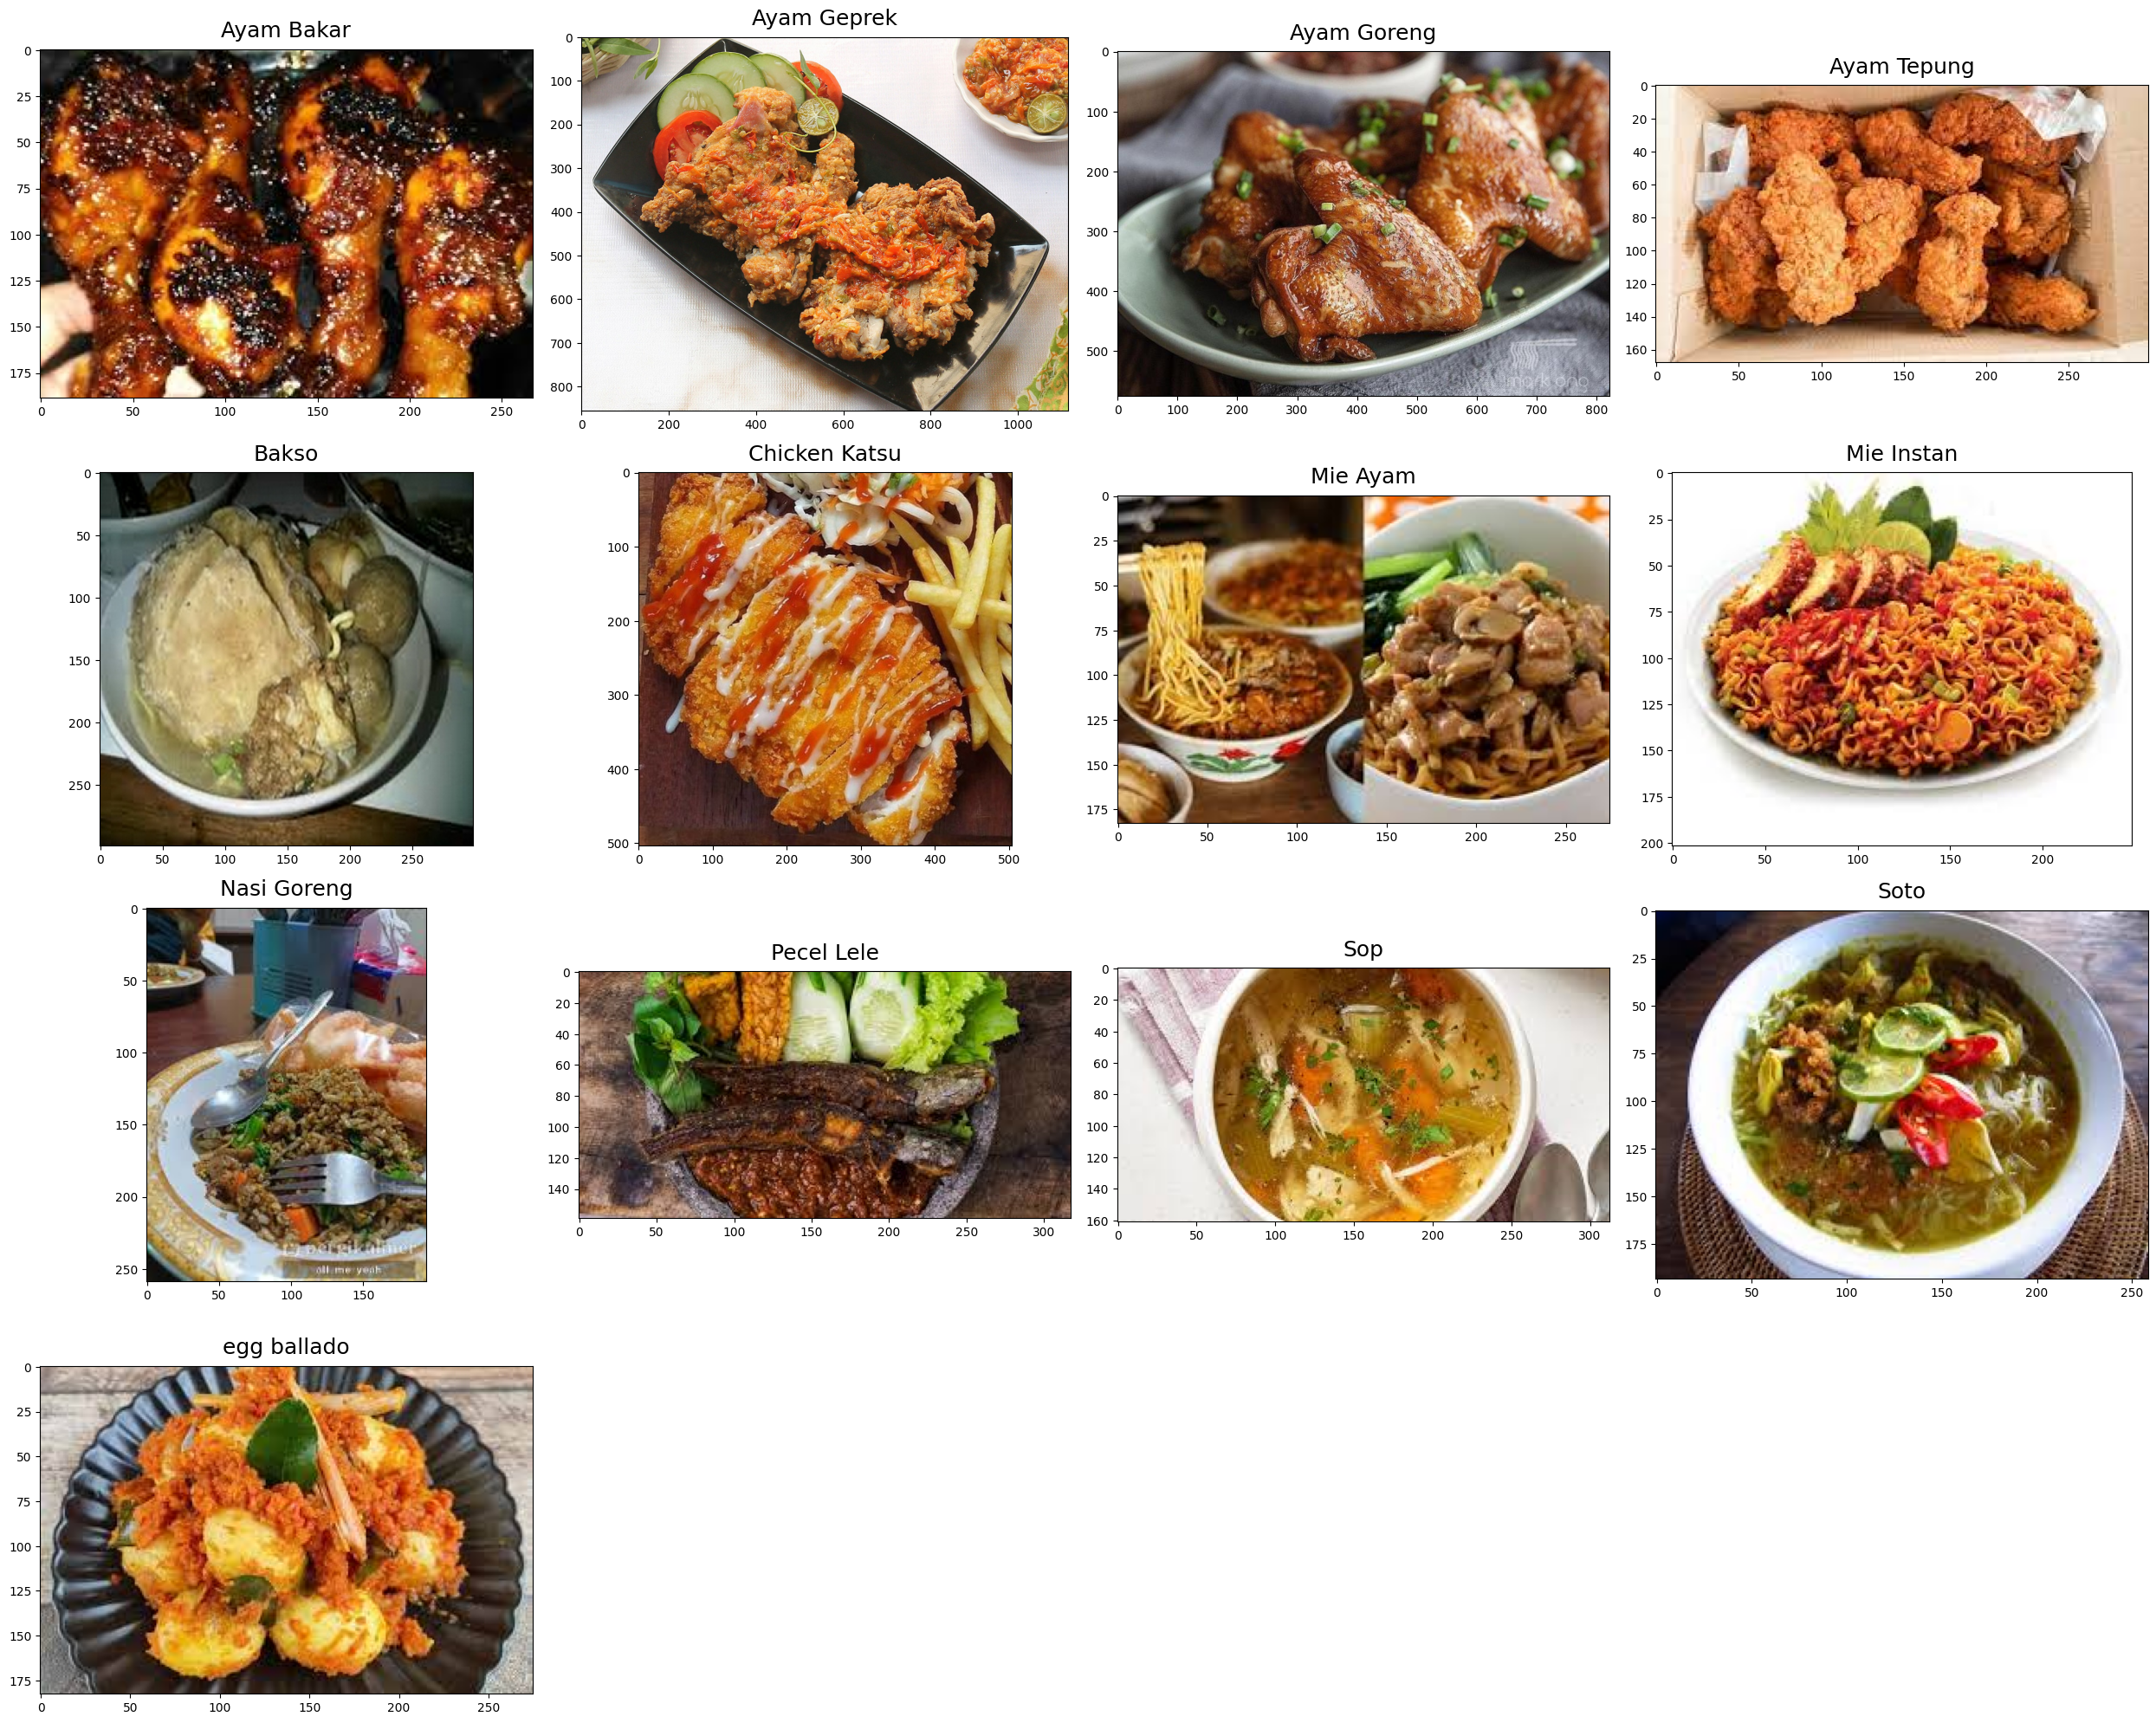

In [2]:
train_dir = "Image Eye/Train"
test_dir = "Image Eye/Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./ 255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.4,
                                                                horizontal_flip=True,
                                                                fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(244, 244),
                                                    batch_size=32,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(244, 244),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 3901 images belonging to 13 classes.
Found 882 images belonging to 13 classes.


Pakai MobileNet ngga usah pakai link kaya Inception, langsung dipanggil aja tinggal ganti versionnya aja.

Referensi: https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2/blob/main/Transfer_learning_with_MobileNet_v1-Copy1.md#3

Sumber coursera : https://colab.research.google.com/drive/1gfaEHcPhTgab4emO8FE8f-TxdZ4mTLV8?authuser=1 (Cuma pakai inception sih)

In [4]:
import tensorflow as tf
# Loading the Pre-trained MobileNet Model
from tensorflow.keras.applications import Xception
# Loading the Pre-trained Xception Model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

total_layers = len(base_model.layers)

fn_layers = total_layers - int(0.5 * total_layers)
# Freezing the Base Layer
for layer in base_model.layers[:fn_layers]:
    layer.trainable = False
# last_layer = base_model.get_layer('conv_dw_10_bn')

#base_model.summary()                        

In [5]:
trainable_layers = [layer.name for layer in base_model.layers if layer.trainable]
print("Trainable Layers:")
for layer in trainable_layers:
    print(layer)

Trainable Layers:
block8_sepconv1_act
block8_sepconv1
block8_sepconv1_bn
block8_sepconv2_act
block8_sepconv2
block8_sepconv2_bn
block8_sepconv3_act
block8_sepconv3
block8_sepconv3_bn
add_6
block9_sepconv1_act
block9_sepconv1
block9_sepconv1_bn
block9_sepconv2_act
block9_sepconv2
block9_sepconv2_bn
block9_sepconv3_act
block9_sepconv3
block9_sepconv3_bn
add_7
block10_sepconv1_act
block10_sepconv1
block10_sepconv1_bn
block10_sepconv2_act
block10_sepconv2
block10_sepconv2_bn
block10_sepconv3_act
block10_sepconv3
block10_sepconv3_bn
add_8
block11_sepconv1_act
block11_sepconv1
block11_sepconv1_bn
block11_sepconv2_act
block11_sepconv2
block11_sepconv2_bn
block11_sepconv3_act
block11_sepconv3
block11_sepconv3_bn
add_9
block12_sepconv1_act
block12_sepconv1
block12_sepconv1_bn
block12_sepconv2_act
block12_sepconv2
block12_sepconv2_bn
block12_sepconv3_act
block12_sepconv3
block12_sepconv3_bn
add_10
block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
blo

In [6]:
inisiate_lr = 0.0001
epochs = 20

def lr_scedhuler(epoch):
    return inisiate_lr * 0.5 ** epoch 

optimizers=tf.keras.optimizers.Adam(learning_rate=inisiate_lr)

In [7]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(13, activation='softmax')  # Menggunakan softmax karena ini adalah klasifikasi multikelas
])

model.compile(optimizer= optimizers,
              loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy untuk klasifikasi multikelas
              metrics=['accuracy'])

Lanjut masukin model

In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.93 and logs.get('accuracy') > 0.95):
      # Stop if threshold is met
      print("\nYOU DID IT GIRLLLL< BOTH ARE HIGHER THAN 0.94 DAMN SLAYYY!! :P")
      self.model.stop_training = True

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Instantiate class
callbacks = myCallback()

In [30]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [31]:
# AKURASI AWALNYA 0.2 
epochs= 20

history=model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=epochs, verbose=1, callbacks=[callbacks, reduce_lr])  # Sesuaikan jumlah langkah per epoch sesuai kebutuhan

Epoch 1/20
122/122 [==============================] - 45s 368ms/step - loss: 0.0641 - accuracy: 0.9774 - val_loss: 0.3109 - val_accuracy: 0.9297 - lr: 1.0000e-04
Epoch 2/20
122/122 [==============================] - 45s 365ms/step - loss: 0.0889 - accuracy: 0.9710 - val_loss: 0.3568 - val_accuracy: 0.9218 - lr: 1.0000e-04
Epoch 3/20
122/122 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9721
YOU DID IT GIRLLLL< BOTH ARE HIGHER THAN 0.94 DAMN SLAYYY!! :P
122/122 [==============================] - 46s 372ms/step - loss: 0.0875 - accuracy: 0.9721 - val_loss: 0.2443 - val_accuracy: 0.9422 - lr: 1.0000e-04


In [11]:
from sklearn.metrics import f1_score

# Melakukan prediksi pada data uji
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Menggunakan argmax untuk mendapatkan kelas prediksi
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung F1 score
f1score = f1_score(y_true, y_pred_classes, average='weighted')

print("F1 Score:", f1score)

28/28 [==============================] - 5s 167ms/step
F1 Score: 0.08025508731001972


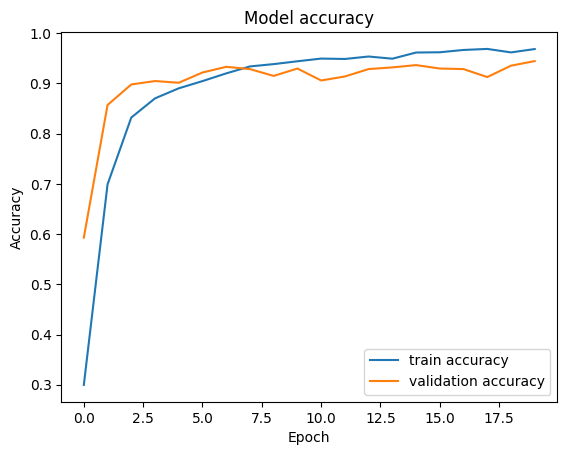

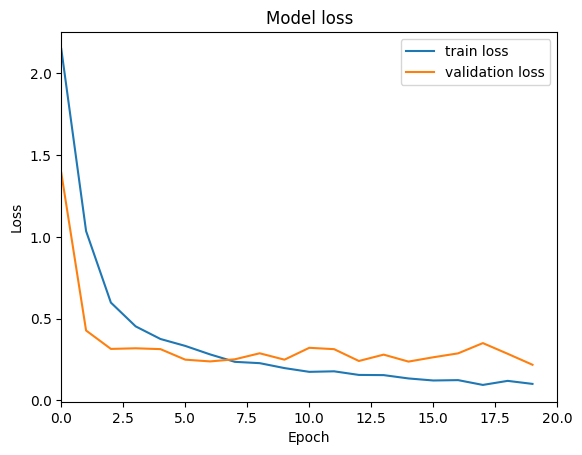

In [12]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim(0, epochs )
    #plt.ylim(0,100)
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history)
plot_loss(history)

In [13]:
predictions = np.argmax(model.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions)
clr = classification_report(test_generator.labels, predictions, target_names=test_generator.class_indices, zero_division=0)

28/28 [==============================] - 4s 160ms/step


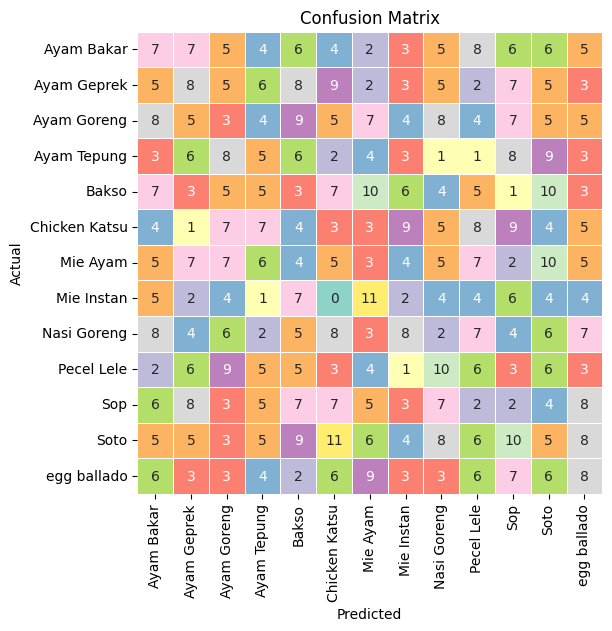

In [14]:
plt.figure(figsize=(6,6))
#sns.heatmap(cm, annot=True, fmt='d', vmin=0, plt.cm.colors.ListedColormap(['#FFC0CB']), cbar=False, linewidths=.5)
sns.heatmap(cm, annot=True, fmt='d', vmin=0, cmap='Set3', cbar=False, linewidths=.5)
plt.xticks(ticks=np.arange(13) + 0.5, labels=test_generator.class_indices, rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=test_generator.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 54ms/step


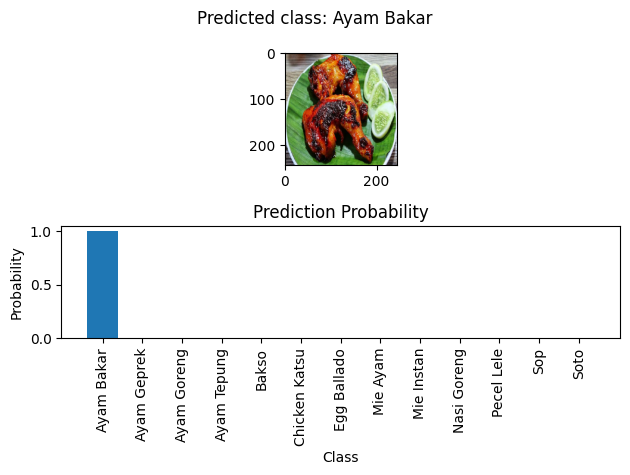

Predicted class for Image Eye\Dev\ayam bakar dev.jpg is Ayam Bakar
1/1 [==============================] - 0s 46ms/step


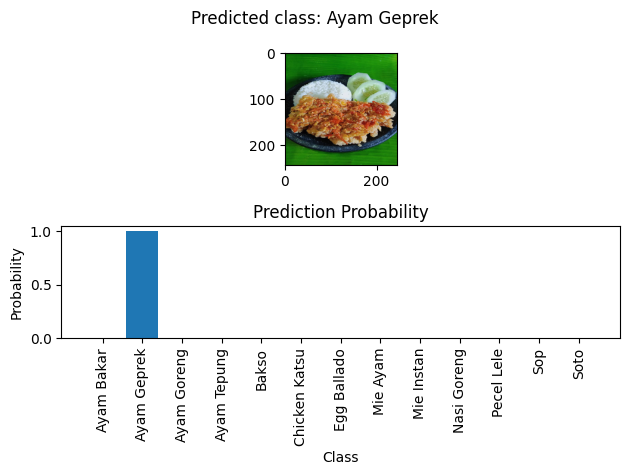

Predicted class for Image Eye\Dev\ayam geprek dev.jpg is Ayam Geprek
1/1 [==============================] - 0s 24ms/step


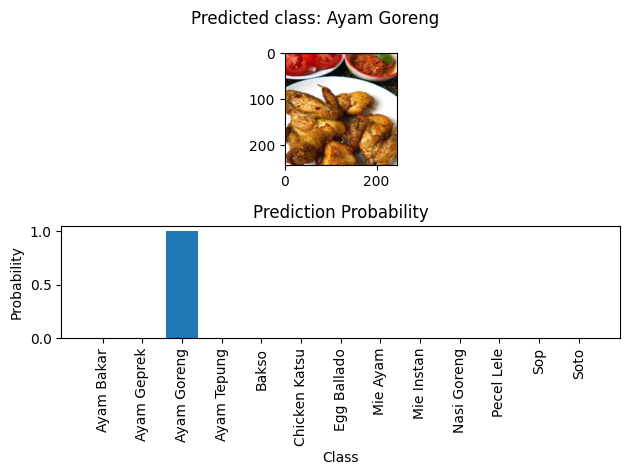

Predicted class for Image Eye\Dev\ayam goreng dev.jpg is Ayam Goreng
1/1 [==============================] - 0s 27ms/step


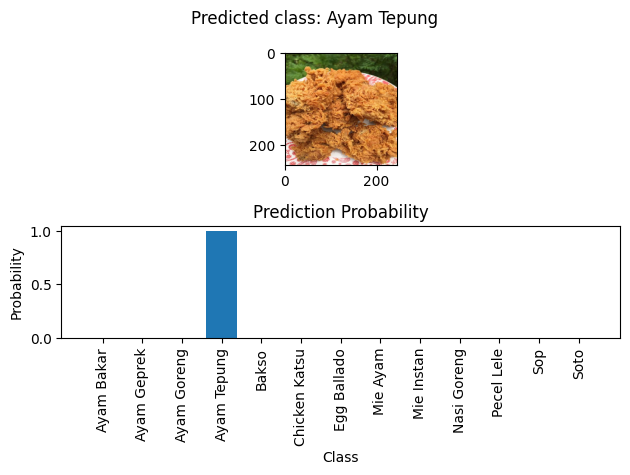

Predicted class for Image Eye\Dev\ayam tepung dev.jpg is Ayam Tepung
1/1 [==============================] - 0s 27ms/step


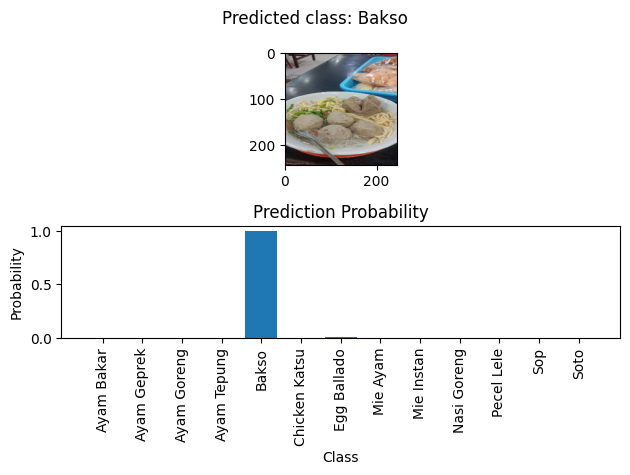

Predicted class for Image Eye\Dev\bakso dev.jpg is Bakso
1/1 [==============================] - 0s 28ms/step


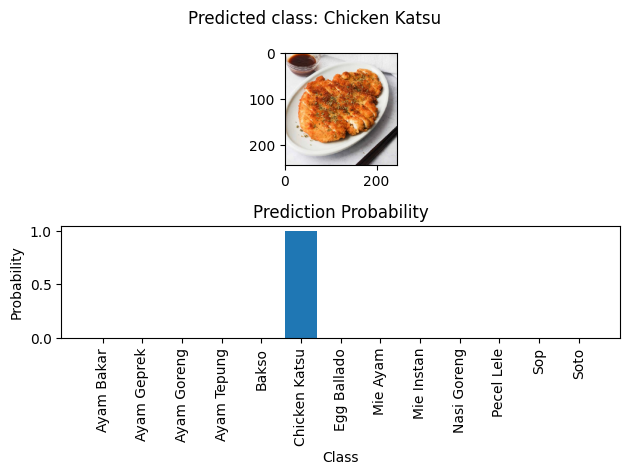

Predicted class for Image Eye\Dev\chicken katsu dev.jpg is Chicken Katsu
1/1 [==============================] - 0s 26ms/step


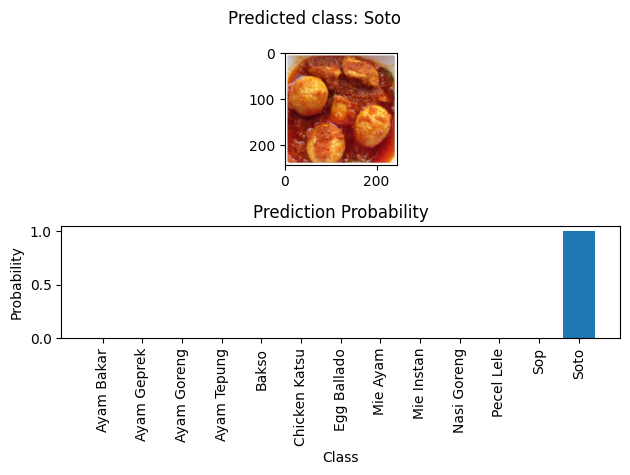

Predicted class for Image Eye\Dev\egg balado dev.jpg is Soto
1/1 [==============================] - 0s 28ms/step


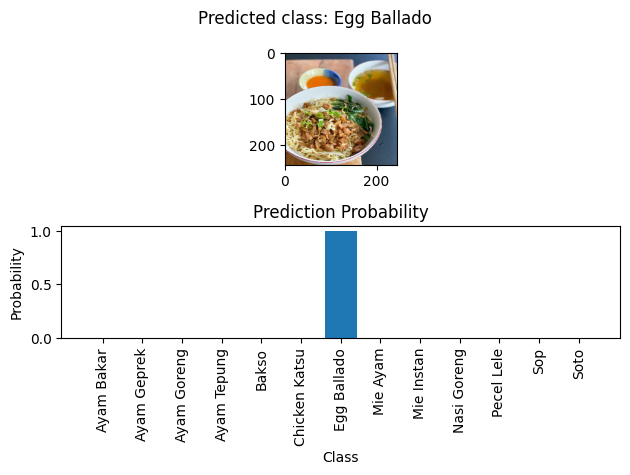

Predicted class for Image Eye\Dev\mie ayam dev.jpg is Egg Ballado
1/1 [==============================] - 0s 23ms/step


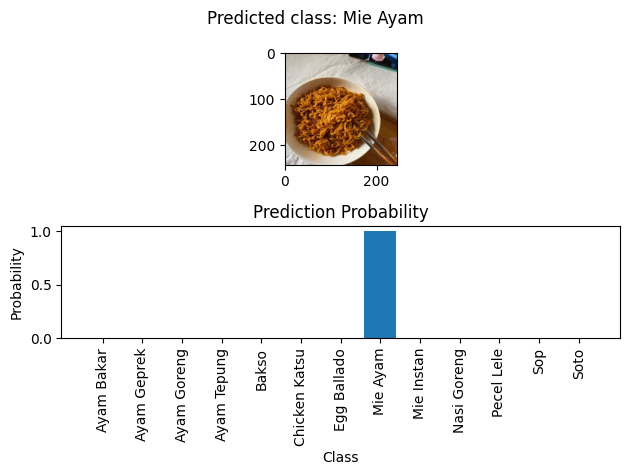

Predicted class for Image Eye\Dev\mie instan dev.jpg is Mie Ayam
1/1 [==============================] - 0s 24ms/step


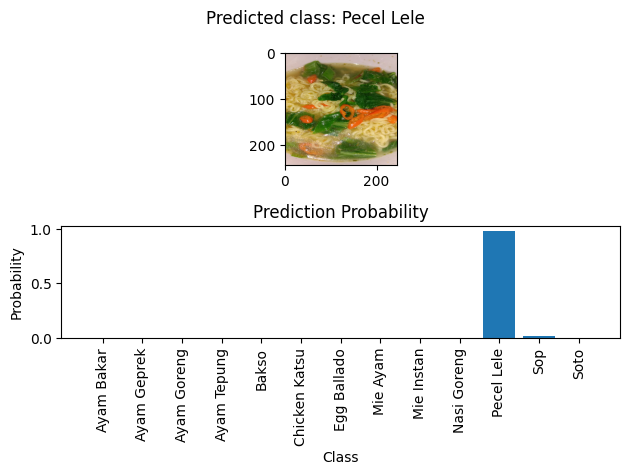

Predicted class for Image Eye\Dev\mie kuah dev.jpg is Pecel Lele
1/1 [==============================] - 0s 26ms/step


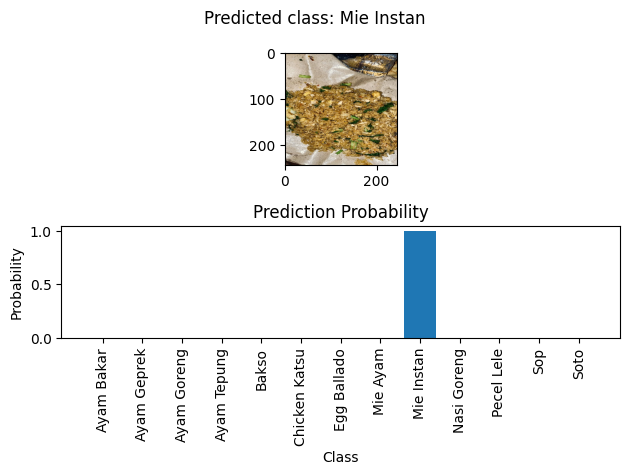

Predicted class for Image Eye\Dev\nasgot dev.jpg is Mie Instan
1/1 [==============================] - 0s 25ms/step


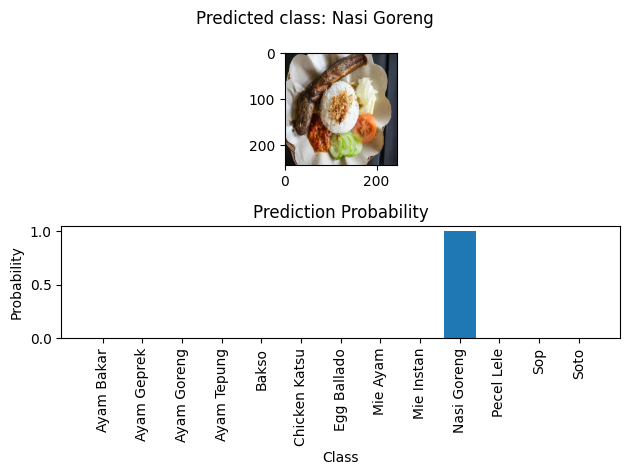

Predicted class for Image Eye\Dev\pecel lele dev.jpg is Nasi Goreng
1/1 [==============================] - 0s 24ms/step


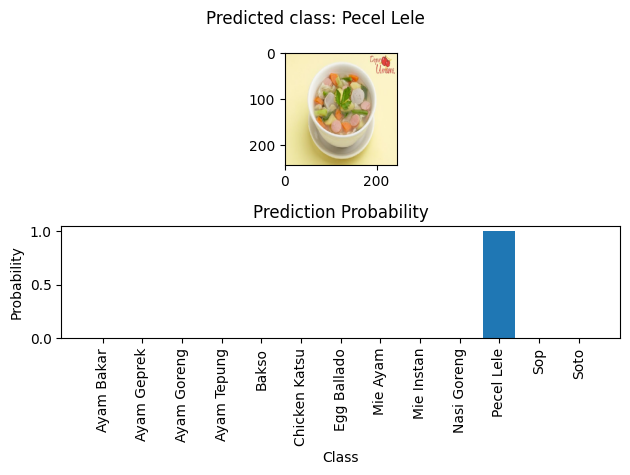

Predicted class for Image Eye\Dev\sop dev.jpg is Pecel Lele
1/1 [==============================] - 0s 25ms/step


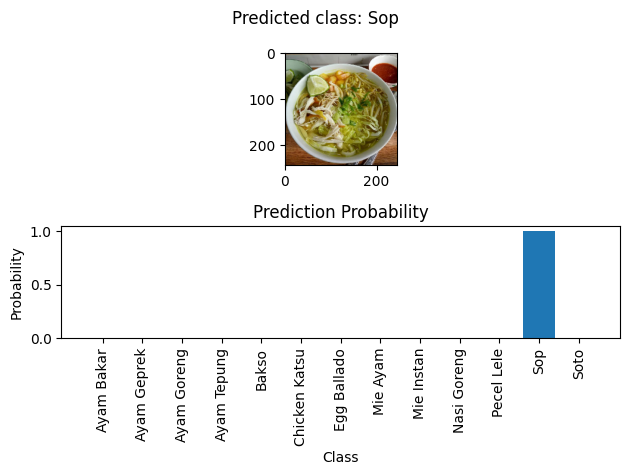

Predicted class for Image Eye\Dev\soto dev.jpg is Sop


In [24]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

class_labels = ["Ayam Bakar", "Ayam Geprek", "Ayam Goreng", "Ayam Tepung", "Bakso","Chicken Katsu", "Egg Ballado", 
                "Mie Ayam", "Mie Instan", "Nasi Goreng", "Pecel Lele", "Sop", "Soto",]

# Path to the directory containing your test images
test_dir = os.path.join('Image Eye','Dev')

# Get a list of all image files in the test directory
image_paths = [os.path.join(test_dir, file) for file in os.listdir(test_dir) if file.endswith(('.jpg', '.png', '.jpeg'))]

for image_path in image_paths:
    # Load and preprocess the image using Pillow (PIL)
    img = load_img(image_path, target_size=(244, 244))  # Load and resize the image
    x = img_to_array(img)  # Convert the image to a NumPy array
    x = x / 255.0  # Normalize the pixel values to the range [0, 1]

    # Predict using the model
    yhat = model.predict(np.expand_dims(x, axis=0))
    predicted_class = np.argmax(yhat, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    fig, ax = plt.subplots(nrows=2, ncols=1)  # Membuat subplots dengan 2 baris dan 1 kolom
    fig.suptitle(f'Class: {image_path}')
    fig.suptitle(f'Predicted class: {predicted_label}')
    
    # Menampilkan gambar di subplot pertama
    ax[0].imshow(x)  
    # Menampilkan kelas prediksi di subplot kedua
    ax[1].bar(class_labels, yhat.flatten())
    ax[1].set_title('Prediction Probability')
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel('Probability')

    ax[1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    print(f'Predicted class for {image_path} is {predicted_label}')
    #print(f'Class index: {predicted_class}')

    #plt.imshow(x)  # Display the resized image
    #plt.title(f'Predicted class: {predicted_label}')
    #plt.show()

https://www.kaggle.com/code/mehrdadsadeghi/fashionmnist-cnn-with-tensorflow-confusionmatrix

In [16]:
# Save the model
#from tensorflow.keras.models import load_model
#model.save('foodnutrition.h5')